# Lecture 3 Pandas

In [1]:
import numpy as np

import pandas as pd

Pandas provides two types of classes for handling data:

* Series: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.

* DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

## Object creation

Creating a Series by passing a list of values, letting pandas create a default RangeIndex.



In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20240304", periods=6)

In [5]:
dates

DatetimeIndex(['2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-09'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [7]:
df

,A,B,C,D
2024-03-04,-0.756207,1.510361,0.337024,1.127544
2024-03-05,-1.088456,-0.025907,0.268273,1.487004
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081
2024-03-07,0.095006,0.113785,0.747515,1.063715
2024-03-08,0.793368,0.385850,0.723448,0.644845
2024-03-09,-0.515756,0.445482,1.308292,-1.588143


In [10]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20240304"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2024-03-04,1.0,3,test,foo
1,1.0,2024-03-04,1.0,3,train,foo
2,1.0,2024-03-04,1.0,3,test,foo
3,1.0,2024-03-04,1.0,3,train,foo


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [14]:
df.head()

,A,B,C,D
2024-03-04,-0.756207,1.510361,0.337024,1.127544
2024-03-05,-1.088456,-0.025907,0.268273,1.487004
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081
2024-03-07,0.095006,0.113785,0.747515,1.063715
2024-03-08,0.793368,0.385850,0.723448,0.644845


In [15]:
df.tail(3)

,A,B,C,D
2024-03-07,0.095006,0.113785,0.747515,1.063715
2024-03-08,0.793368,0.385850,0.723448,0.644845
2024-03-09,-0.515756,0.445482,1.308292,-1.588143


In [16]:
df.index

DatetimeIndex(['2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-09'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.to_numpy()

array([[-0.75620743,  1.51036074,  0.33702361,  1.12754377],
       [-1.08845608, -0.02590723,  0.26827332,  1.48700368],
       [-0.52734069,  1.28384045, -0.46598548, -0.26308119],
       [ 0.09500551,  0.11378509,  0.74751505,  1.06371542],
       [ 0.79336758,  0.38584981,  0.72344793,  0.64484496],
       [-0.51575582,  0.44548183,  1.30829226, -1.58814258]])

In [19]:
df2.to_numpy()

array([[1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.333231,0.618902,0.486428,0.411981
std,0.674222,0.631213,0.596123,1.149164
min,-1.088456,-0.025907,-0.465985,-1.588143
25%,-0.698991,0.181801,0.285461,-0.036100
50%,-0.521548,0.415666,0.530236,0.854280
75%,-0.057685,1.074251,0.741498,1.111587
max,0.793368,1.510361,1.308292,1.487004


In [21]:
df.T

,2024-03-04,2024-03-05,2024-03-06,2024-03-07,2024-03-08,2024-03-09
A,-0.756207,-1.088456,-0.527341,0.095006,0.793368,-0.515756
B,1.510361,-0.025907,1.283840,0.113785,0.385850,0.445482
C,0.337024,0.268273,-0.465985,0.747515,0.723448,1.308292
D,1.127544,1.487004,-0.263081,1.063715,0.644845,-1.588143


In [22]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2024-03-04,1.127544,0.337024,1.510361,-0.756207
2024-03-05,1.487004,0.268273,-0.025907,-1.088456
2024-03-06,-0.263081,-0.465985,1.283840,-0.527341
2024-03-07,1.063715,0.747515,0.113785,0.095006
2024-03-08,0.644845,0.723448,0.385850,0.793368
2024-03-09,-1.588143,1.308292,0.445482,-0.515756


In [23]:
df.sort_values(by="B")

,A,B,C,D
2024-03-05,-1.088456,-0.025907,0.268273,1.487004
2024-03-07,0.095006,0.113785,0.747515,1.063715
2024-03-08,0.793368,0.385850,0.723448,0.644845
2024-03-09,-0.515756,0.445482,1.308292,-1.588143
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081
2024-03-04,-0.756207,1.510361,0.337024,1.127544


### Get item

In [24]:
df["A"]

2024-03-04   -0.756207
2024-03-05   -1.088456
2024-03-06   -0.527341
2024-03-07    0.095006
2024-03-08    0.793368
2024-03-09   -0.515756
Freq: D, Name: A, dtype: float64

In [25]:
df[0:3]

,A,B,C,D
2024-03-04,-0.756207,1.510361,0.337024,1.127544
2024-03-05,-1.088456,-0.025907,0.268273,1.487004
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081


In [26]:
df["2024-03-05":"2024-03-09"]

,A,B,C,D
2024-03-05,-1.088456,-0.025907,0.268273,1.487004
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081
2024-03-07,0.095006,0.113785,0.747515,1.063715
2024-03-08,0.793368,0.385850,0.723448,0.644845
2024-03-09,-0.515756,0.445482,1.308292,-1.588143


### Selection by label

In [27]:
df.loc[dates[0]]

A   -0.756207
B    1.510361
C    0.337024
D    1.127544
Name: 2024-03-04 00:00:00, dtype: float64

In [28]:
df.loc[:, ["A", "B"]]


,A,B
2024-03-04,-0.756207,1.510361
2024-03-05,-1.088456,-0.025907
2024-03-06,-0.527341,1.283840
2024-03-07,0.095006,0.113785
2024-03-08,0.793368,0.385850
2024-03-09,-0.515756,0.445482


In [29]:
df.loc["2024-03-05":"2024-03-09", ["A", "B"]]

,A,B
2024-03-05,-1.088456,-0.025907
2024-03-06,-0.527341,1.283840
2024-03-07,0.095006,0.113785
2024-03-08,0.793368,0.385850
2024-03-09,-0.515756,0.445482


In [30]:
df.loc[dates[0], "A"]

-0.7562074294611416

In [31]:
df.at[dates[0], "A"]

-0.7562074294611416

### Selection by position

In [32]:
df.iloc[3]

A    0.095006
B    0.113785
C    0.747515
D    1.063715
Name: 2024-03-07 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2024-03-07,0.095006,0.113785
2024-03-08,0.793368,0.385850


In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2024-03-05,-1.088456,0.268273
2024-03-06,-0.527341,-0.465985
2024-03-08,0.793368,0.723448


In [35]:
df.iloc[1:3, :]

,A,B,C,D
2024-03-05,-1.088456,-0.025907,0.268273,1.487004
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081


In [36]:
df.iloc[:, 1:3]

,B,C
2024-03-04,1.510361,0.337024
2024-03-05,-0.025907,0.268273
2024-03-06,1.283840,-0.465985
2024-03-07,0.113785,0.747515
2024-03-08,0.385850,0.723448
2024-03-09,0.445482,1.308292


In [37]:
df.iloc[1, 1]

-0.02590723262505998

In [38]:
df.iat[1, 1]

-0.02590723262505998

### Boolean indexing

In [39]:
df[df["A"] > 0]

,A,B,C,D
2024-03-07,0.095006,0.113785,0.747515,1.063715
2024-03-08,0.793368,0.385850,0.723448,0.644845


In [40]:
df[df > 0]

,A,B,C,D
2024-03-04,NaN,1.510361,0.337024,1.127544
2024-03-05,NaN,NaN,0.268273,1.487004
2024-03-06,NaN,1.283840,NaN,NaN
2024-03-07,0.095006,0.113785,0.747515,1.063715
2024-03-08,0.793368,0.385850,0.723448,0.644845
2024-03-09,NaN,0.445482,1.308292,NaN


In [41]:
df2 = df.copy()

In [42]:
#add new column
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [43]:
df2

,A,B,C,D,E
2024-03-04,-0.756207,1.510361,0.337024,1.127544,one
2024-03-05,-1.088456,-0.025907,0.268273,1.487004,one
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081,two
2024-03-07,0.095006,0.113785,0.747515,1.063715,three
2024-03-08,0.793368,0.385850,0.723448,0.644845,four
2024-03-09,-0.515756,0.445482,1.308292,-1.588143,three


### Setting

In [44]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20240304", periods=6))


In [45]:
df["F"] = s1

In [46]:
df

,A,B,C,D,F
2024-03-04,-0.756207,1.510361,0.337024,1.127544,1
2024-03-05,-1.088456,-0.025907,0.268273,1.487004,2
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081,3
2024-03-07,0.095006,0.113785,0.747515,1.063715,4
2024-03-08,0.793368,0.385850,0.723448,0.644845,5
2024-03-09,-0.515756,0.445482,1.308292,-1.588143,6


In [47]:
df.at[dates[0], "A"] = 0

In [48]:
df

,A,B,C,D,F
2024-03-04,0.000000,1.510361,0.337024,1.127544,1
2024-03-05,-1.088456,-0.025907,0.268273,1.487004,2
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081,3
2024-03-07,0.095006,0.113785,0.747515,1.063715,4
2024-03-08,0.793368,0.385850,0.723448,0.644845,5
2024-03-09,-0.515756,0.445482,1.308292,-1.588143,6


In [49]:
df.iat[0, 1] = 0

In [50]:
df.loc[:, "D"] = np.array([5] * len(df))

/var/folders/vl/q2hgcdvs435_0rq4cfpntjlr0000gn/T/ipykernel_27885/2422562958.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "D"] = np.array([5] * len(df))


In [51]:
df

,A,B,C,D,F
2024-03-04,0.000000,0.000000,0.337024,5,1
2024-03-05,-1.088456,-0.025907,0.268273,5,2
2024-03-06,-0.527341,1.283840,-0.465985,5,3
2024-03-07,0.095006,0.113785,0.747515,5,4
2024-03-08,0.793368,0.385850,0.723448,5,5
2024-03-09,-0.515756,0.445482,1.308292,5,6


In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2024-03-04,0.000000,0.000000,-0.337024,-5,-1
2024-03-05,-1.088456,-0.025907,-0.268273,-5,-2
2024-03-06,-0.527341,-1.283840,-0.465985,-5,-3
2024-03-07,-0.095006,-0.113785,-0.747515,-5,-4
2024-03-08,-0.793368,-0.385850,-0.723448,-5,-5
2024-03-09,-0.515756,-0.445482,-1.308292,-5,-6


## Missing value

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [56]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [57]:
df1

,A,B,C,D,F,E
2024-03-04,0.000000,0.000000,0.337024,5,1,1.0
2024-03-05,-1.088456,-0.025907,0.268273,5,2,1.0
2024-03-06,-0.527341,1.283840,-0.465985,5,3,NaN
2024-03-07,0.095006,0.113785,0.747515,5,4,NaN


In [58]:
df1.dropna(how="any")

,A,B,C,D,F,E
2024-03-04,0.000000,0.000000,0.337024,5,1,1.0
2024-03-05,-1.088456,-0.025907,0.268273,5,2,1.0


In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2024-03-04,0.000000,0.000000,0.337024,5,1,1.0
2024-03-05,-1.088456,-0.025907,0.268273,5,2,1.0
2024-03-06,-0.527341,1.283840,-0.465985,5,3,5.0
2024-03-07,0.095006,0.113785,0.747515,5,4,5.0


In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2024-03-04,False,False,False,False,False,False
2024-03-05,False,False,False,False,False,False
2024-03-06,False,False,False,False,False,True
2024-03-07,False,False,False,False,False,True


## Operations

In [62]:
df

,A,B,C,D,F
2024-03-04,0.000000,0.000000,0.337024,5,1
2024-03-05,-1.088456,-0.025907,0.268273,5,2
2024-03-06,-0.527341,1.283840,-0.465985,5,3
2024-03-07,0.095006,0.113785,0.747515,5,4
2024-03-08,0.793368,0.385850,0.723448,5,5
2024-03-09,-0.515756,0.445482,1.308292,5,6


In [61]:
df.mean()

A   -0.207197
B    0.367175
C    0.486428
D    5.000000
F    3.500000
dtype: float64

In [63]:
df.mean(axis=1)

2024-03-04    1.267405
2024-03-05    1.230782
2024-03-06    1.658103
2024-03-07    1.991261
2024-03-08    2.380533
2024-03-09    2.447604
Freq: D, dtype: float64

## User defined functions

In [69]:
df

,A,B,C,D,F
2024-03-04,0.000000,0.000000,0.337024,5,1
2024-03-05,-1.088456,-0.025907,0.268273,5,2
2024-03-06,-0.527341,1.283840,-0.465985,5,3
2024-03-07,0.095006,0.113785,0.747515,5,4
2024-03-08,0.793368,0.385850,0.723448,5,5
2024-03-09,-0.515756,0.445482,1.308292,5,6


In [67]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -1.160301
B     2.056180
C     2.723996
D    28.000000
F    19.600000
dtype: float64

In [70]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2024-03-04,0.000000,0.000000,34.106789,506.0,101.2
2024-03-05,-110.151755,-2.621812,27.149260,506.0,202.4
2024-03-06,-53.366878,129.924653,-47.157731,506.0,303.6
2024-03-07,9.614558,11.515051,75.648523,506.0,404.8
2024-03-08,80.288800,39.048000,73.212930,506.0,506.0
2024-03-09,-52.194489,45.082762,132.399177,506.0,607.2


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria

* Applying a function to each group independently

* Combining the results into a data structure

In [71]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [72]:
df

,A,B,C,D
0,foo,one,0.117582,-0.385816
1,bar,one,-0.219530,-0.414616
2,foo,two,-0.029306,0.174871
3,bar,three,1.507323,-0.710797
4,foo,two,-0.107728,-0.964037
5,bar,two,-1.912368,0.259380
6,foo,one,0.351644,0.948642
7,foo,three,-0.791448,0.564050


In [73]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-0.624576,-0.866034
foo,-0.459255,0.337710


In [74]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.219530 -0.414616
    three  1.507323 -0.710797
    two   -1.912368  0.259380
foo one    0.469226  0.562826
    three -0.791448  0.564050
    two   -0.137034 -0.789166

## Ploting

In [75]:
import matplotlib.pyplot as plt

In [76]:
plt.close("all")

<Axes: >

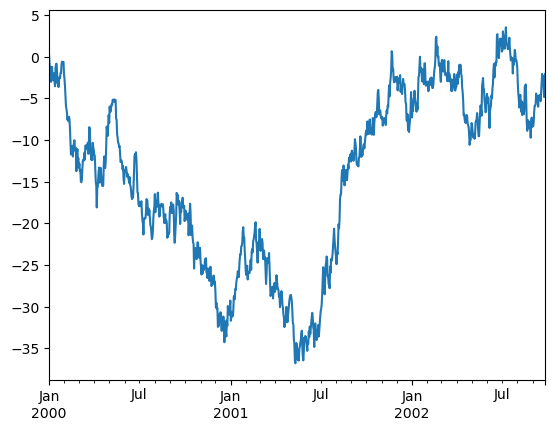

In [77]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

In [78]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [79]:
df = df.cumsum()

<Figure size 640x480 with 0 Axes>

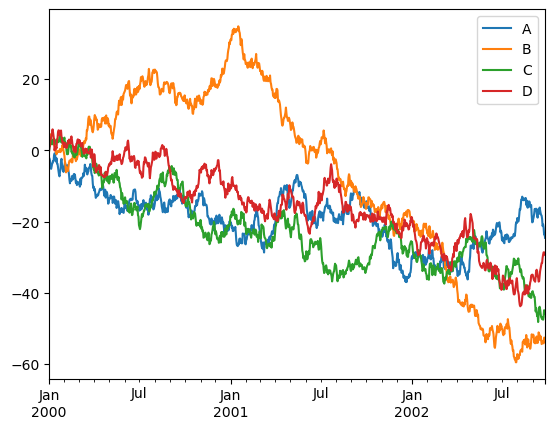

In [80]:
plt.figure()

df.plot()

plt.legend(loc='best')